In [9]:
using Images
using TestImages
using FFTW
using Noise
using PSFModels
using ImageView
using Deconvolution
using Plots
using DeconvOptim
using Colors
using ImageIO
using Noise

In [12]:
function image_to_matrix(filename)
    img = Images.load(filename)
    matrix = reverse(Float64.(Gray.(img)), dims=1)
    return matrix
end

image_to_matrix (generic function with 1 method)

In [13]:
function matrix_to_image(matrix)
    img = reverse(Images.colorview(Gray, matrix), dims=1)
    return img
end

matrix_to_image (generic function with 1 method)

  1.372813 seconds (2.10 M allocations: 400.903 MiB, 3.98% gc time, 68.54% compilation time)
  0.714878 seconds (4.25 k allocations: 133.398 MiB, 58.31% gc time)


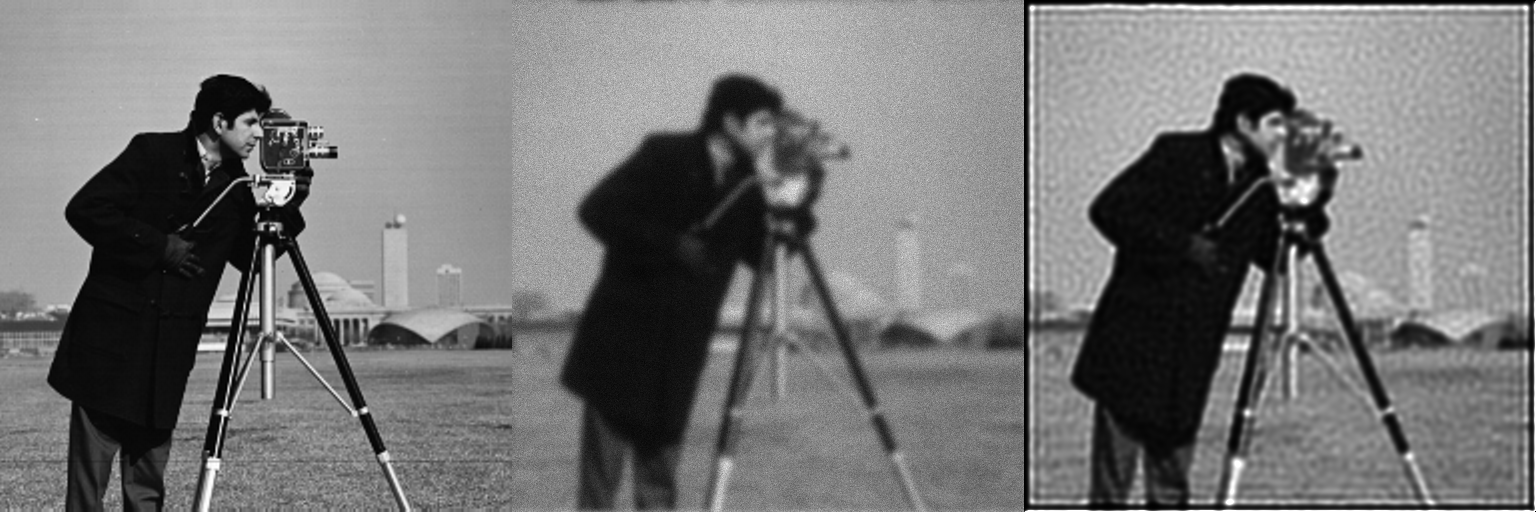

In [11]:
img = Float32.(testimage("cameraman"))
psf = Float32.(generate_psf(size(img), 30))
blurred_img = conv(img, psf)
noisy_img = poisson(blurred_img, 300)

@time res, o = deconvolution(noisy_img, psf)
@time res_no_reg, o = deconvolution(noisy_img, psf, regularizer=nothing)

Gray.([img noisy_img res])

  2.330544 seconds (2.10 M allocations: 548.246 MiB, 6.14% gc time, 41.80% compilation time)
  1.270577 seconds (4.24 k allocations: 198.322 MiB, 28.77% gc time)


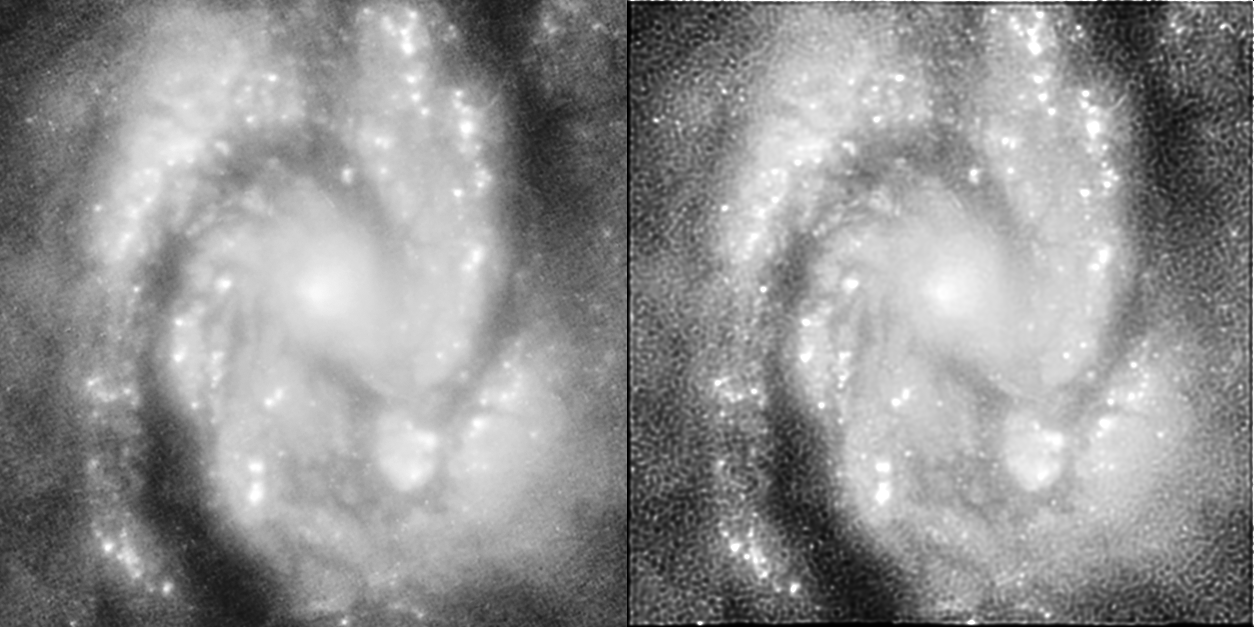

In [16]:
hubble_img = Images.load("image.tif")
hubble_img = Float32.(Gray.(hubble_img))
hubble_psf = Float32.(generate_psf(size(hubble_img), 60))

@time hubble_res, o = deconvolution(hubble_img, hubble_psf)
@time res_no_reg, o = deconvolution(hubble_img, hubble_psf, regularizer=nothing)

x = Gray.([hubble_img hubble_res])
matrix_to_image(x)

 10.401287 seconds (602.74 k allocations: 5.324 GiB, 16.22% gc time, 12.77% compilation time)
 90.476300 seconds (100.04 k allocations: 52.750 GiB, 15.43% gc time)


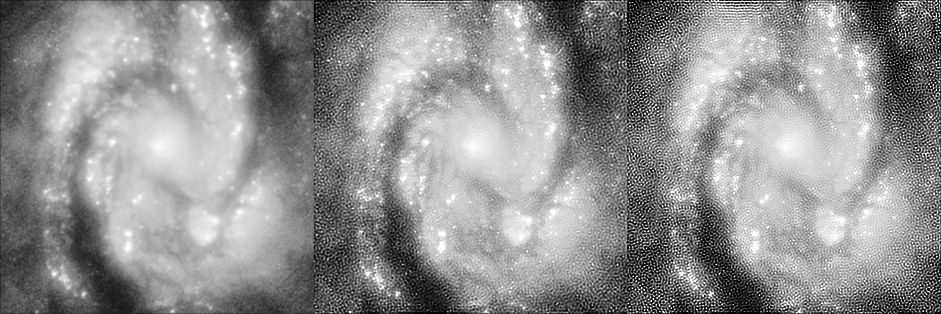

In [17]:
@time lucy_res200 = lucy(hubble_img, hubble_psf, iterations=200)
@time lucy_res2000 = lucy(hubble_img, hubble_psf, iterations=2000)

x = Gray.([hubble_img lucy_res200 lucy_res2000])
matrix_to_image(x)